In [30]:
# TODO:
#  - 10 (a) theory
#  - 10 (c) different models, generalization error
#  - 10 (d)

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from statsmodels.sandbox.regression import predstd



In [32]:
df = pd.read_csv('Auto.csv')


In [33]:
df = df[df['horsepower'] != '?']
df['origin'] = df['origin'].astype('category')

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [34]:
# 10 (a)
result = sm.ols(formula="mpg ~ horsepower", data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.01
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.13e-47
Time:                        19:45:11   Log-Likelihood:                -829.75
No. Observations:                 316   AIC:                             1835.
Df Residuals:                     228   BIC:                             2166.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.8154      1.092     18.154      0.000      17.665      21.966
horsepower[T.102]     0.1846      4.084      0.045      0.964      -7.863       8.232
horsepower[T.103]     0.4846      4.084      0.119      0.906      -7.563       8.532
horsepower[T.105]     0.4179      1.707      0.245      0.807      -2.945       3.781
horsepower[T.107]     1.1846      4.084      0.290      0.772      -6.863       9.232
horsepower[T.110]     0.2301      1.612      0.143      0.887      -2.947       3.407
horsepower[T.112]    -0.1487      2.521     -0.059      0.953      -5.116       4.818
horsepower[T.113]     6.1846      4.084      1.514      0.131      -1.863      14.232
horsepower[T.115]     4.9246      2.071      2.378      0.018       0.844       9.005
horsepower[T.116]     5.5846      4.084      1.367      0.173      -2.463      13.632
horsepower[T.120]     1.3346      2.989      0.446      0.656      -4.555       7.225
horsepower[T.122]     0.1846      4.084      0.045      0.964      -7.863       8.232
horsepower[T.125]     0.1846      2.989      0.062      0.951      -5.705       6.075
horsepower[T.129]    -6.8154      4.084     -1.669      0.097     -14.863       1.232
horsepower[T.130]    -4.5654      2.250     -2.029      0.044      -8.999      -0.131
horsepower[T.132]    12.8846      4.084      3.155      0.002       4.837      20.932
horsepower[T.133]    -3.6154      4.084     -0.885      0.377     -11.663       4.432
horsepower[T.135]    -1.6154      4.084     -0.396      0.693      -9.663       6.432
horsepower[T.137]    -5.8154      4.084     -1.424      0.156     -13.863       2.232
horsepower[T.138]    -3.3154      4.084     -0.812      0.418     -11.363       4.732
horsepower[T.139]    -1.7154      4.084     -0.420      0.675      -9.763       6.332
horsepower[T.140]    -3.0354      2.071     -1.466      0.144      -7.116       1.045
horsepower[T.142]    -4.3154      4.084     -1.057      0.292     -12.363       3.732
horsepower[T.145]    -4.3582      1.845     -2.362      0.019      -7.994      -0.723
horsepower[T.148]    -5.8154      4.084     -1.424      0.156     -13.863       2.232
horsepower[T.149]    -3.8154      4.084     -0.934      0.351     -11.863       4.232
horsepower[T.150]    -5.0213      1.450     -3.463      0.001      -7.878      -2.164
horsepower[T.152]    -5.3154      4.084     -1.301      0.194     -13.363       2.732
horsepower[T.153]    -5.8154      2.989     -1.945      0.053     -11.705       0.075
horsepower[T.155]    -4.8654      2.989     -1.628      0.105     -10.755       1.025
horsepower[T.158]    -6.8154      4.084     -1.669      0.097     -14.863       1.232
horsepower[T.160]    -6.8154      2.989     -2.280      0.024     -12.705      -0.925
horsepower[T.165]    -4.8904      2.250     -2.173      0.031      -9.324

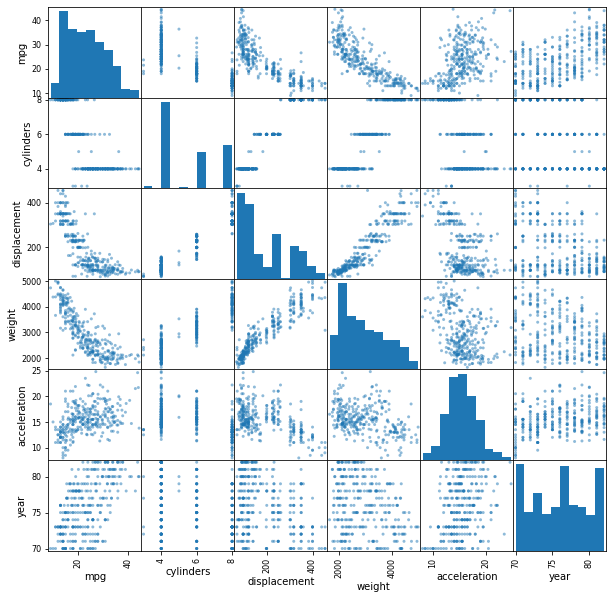

In [35]:
# 10 (b)
m = pd.plotting.scatter_matrix(train, figsize=(10, 10))

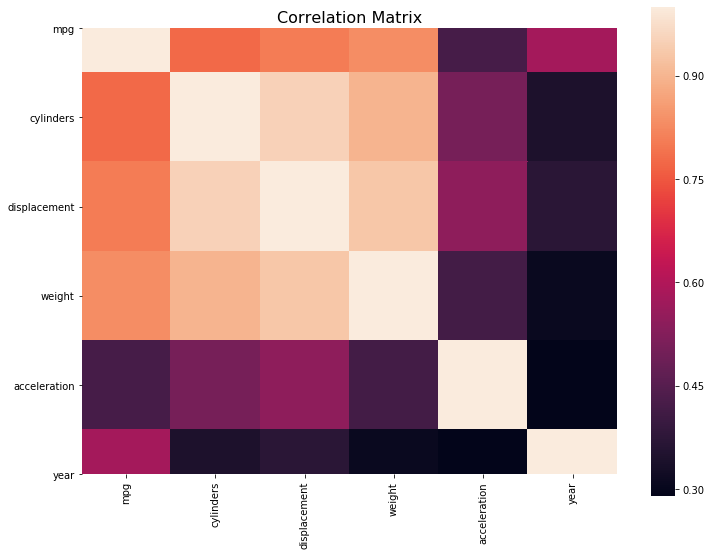

In [36]:
corr_mtrx = df.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mtrx, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);
plt.title('Correlation Matrix', fontsize=16);


In [37]:
# 10 (c)

model = sm.ols(formula='mpg ~ ' + '+'.join(df.columns.difference(['name', 'mpg'])), data=train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     23.15
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           4.87e-77
Time:                        19:45:14   Log-Likelihood:                -713.65
No. Observations:                 316   AIC:                             1617.
Df Residuals:                     221   BIC:                             1974.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.8549      4.741     -3.344      0.001     -25.198      -6.512
horsepower[T.102]    -1.9866      2.956     -0.672      0.502      -7.812       3.839
horsepower[T.103]    -4.5341      2.979     -1.522      0.129     -10.405       1.336
horsepower[T.105]     0.9717      1.212      0.801      0.424      -1.418       3.361
horsepower[T.107]    -0.6880      2.970     -0.232      0.817      -6.542       5.166
horsepower[T.110]    -0.9866      1.152     -0.857      0.393      -3.257       1.283
horsepower[T.112]    -2.8597      1.826     -1.566      0.119      -6.458       0.739
horsepower[T.113]     3.6911      2.960      1.247      0.214      -2.141       9.524
horsepower[T.115]     0.4644      1.529      0.304      0.762      -2.549       3.477
horsepower[T.116]    -2.6618      3.007     -0.885      0.377      -8.587       3.264
horsepower[T.120]    -3.1374      2.158     -1.454      0.147      -7.391       1.116
horsepower[T.122]    -2.8961      2.994     -0.967      0.334      -8.796       3.004
horsepower[T.125]    -1.7841      2.210     -0.807      0.420      -6.139       2.571
horsepower[T.129]    -7.7914      2.992     -2.604      0.010     -13.688      -1.895
horsepower[T.130]    -1.9423      1.760     -1.103      0.271      -5.412       1.527
horsepower[T.132]     5.1161      3.019      1.695      0.092      -0.833      11.066
horsepower[T.133]    -6.4794      3.034     -2.136      0.034     -12.458      -0.501
horsepower[T.135]    -1.9421      2.968     -0.654      0.514      -7.790       3.906
horsepower[T.137]    -1.4097      2.996     -0.471      0.638      -7.314       4.495
horsepower[T.138]    -3.4623      3.020     -1.147      0.253      -9.413       2.489
horsepower[T.139]    -4.7242      3.018     -1.565      0.119     -10.672       1.223
horsepower[T.140]     0.1803      1.717      0.105      0.916      -3.203       3.564
horsepower[T.142]    -3.8440      3.003     -1.280      0.202      -9.763       2.075
horsepower[T.145]    -2.0722      1.566     -1.324      0.187      -5.158       1.013
horsepower[T.148]    -0.3602      3.093     -0.116      0.907      -6.455       5.735
horsepower[T.149]    -0.8171      3.014     -0.271      0.787      -6.758       5.123
horsepower[T.150]    -1.1602      1.360     -0.853      0.395      -3.841       1.521
horsepower[T.152]    -2.4650      3.039     -0.811      0.418      -8.454       3.524
horsepower[T.153]    -0.1427      2.305     -0.062      0.951      -4.685       4.400
horsepower[T.155]    -0.5281      2.315     -0.228      0.820      -5.091       4.035
horsepower[T.158]    -1.3040      3.056     -0.427      0.670      -7.327       4.719
horsepower[T.160]    -1.7527      2.378     -0.737      0.462      -6.440       2.935
horsepower[T.165]    -1.1608      1.796     -0.646      0.519      -4.701

In [38]:
# alternative 1: mpg from horsepower
model = sm.ols(formula='mpg ~ horsepower', data=train)
result_1 = model.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.01
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.13e-47
Time:                        19:45:14   Log-Likelihood:                -829.75
No. Observations:                 316   AIC:                             1835.
Df Residuals:                     228   BIC:                             2166.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.8154      1.092     18.154      0.000      17.665      21.966
horsepower[T.102]     0.1846      4.084      0.045      0.964      -7.863       8.232
horsepower[T.103]     0.4846      4.084      0.119      0.906      -7.563       8.532
horsepower[T.105]     0.4179      1.707      0.245      0.807      -2.945       3.781
horsepower[T.107]     1.1846      4.084      0.290      0.772      -6.863       9.232
horsepower[T.110]     0.2301      1.612      0.143      0.887      -2.947       3.407
horsepower[T.112]    -0.1487      2.521     -0.059      0.953      -5.116       4.818
horsepower[T.113]     6.1846      4.084      1.514      0.131      -1.863      14.232
horsepower[T.115]     4.9246      2.071      2.378      0.018       0.844       9.005
horsepower[T.116]     5.5846      4.084      1.367      0.173      -2.463      13.632
horsepower[T.120]     1.3346      2.989      0.446      0.656      -4.555       7.225
horsepower[T.122]     0.1846      4.084      0.045      0.964      -7.863       8.232
horsepower[T.125]     0.1846      2.989      0.062      0.951      -5.705       6.075
horsepower[T.129]    -6.8154      4.084     -1.669      0.097     -14.863       1.232
horsepower[T.130]    -4.5654      2.250     -2.029      0.044      -8.999      -0.131
horsepower[T.132]    12.8846      4.084      3.155      0.002       4.837      20.932
horsepower[T.133]    -3.6154      4.084     -0.885      0.377     -11.663       4.432
horsepower[T.135]    -1.6154      4.084     -0.396      0.693      -9.663       6.432
horsepower[T.137]    -5.8154      4.084     -1.424      0.156     -13.863       2.232
horsepower[T.138]    -3.3154      4.084     -0.812      0.418     -11.363       4.732
horsepower[T.139]    -1.7154      4.084     -0.420      0.675      -9.763       6.332
horsepower[T.140]    -3.0354      2.071     -1.466      0.144      -7.116       1.045
horsepower[T.142]    -4.3154      4.084     -1.057      0.292     -12.363       3.732
horsepower[T.145]    -4.3582      1.845     -2.362      0.019      -7.994      -0.723
horsepower[T.148]    -5.8154      4.084     -1.424      0.156     -13.863       2.232
horsepower[T.149]    -3.8154      4.084     -0.934      0.351     -11.863       4.232
horsepower[T.150]    -5.0213      1.450     -3.463      0.001      -7.878      -2.164
horsepower[T.152]    -5.3154      4.084     -1.301      0.194     -13.363       2.732
horsepower[T.153]    -5.8154      2.989     -1.945      0.053     -11.705       0.075
horsepower[T.155]    -4.8654      2.989     -1.628      0.105     -10.755       1.025
horsepower[T.158]    -6.8154      4.084     -1.669      0.097     -14.863       1.232
horsepower[T.160]    -6.8154      2.989     -2.280      0.024     -12.705      -0.925
horsepower[T.165]    -4.8904      2.250     -2.173      0.031      -9.324

In [39]:
# alternative 2: mpg from horsepower and weight
model = sm.ols(formula='mpg ~ horsepower + weight', data=train)
result_2 = model.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     13.67
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           7.83e-56
Time:                        19:45:14   Log-Likelihood:                -799.52
No. Observations:                 316   AIC:                             1777.
Df Residuals:                     227   BIC:                             2111.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.3873      2.199     15.182      0.000      29.054      37.721
horsepower[T.102]     0.1023      3.720      0.027      0.978      -7.227       7.432
horsepower[T.103]    -0.9681      3.726     -0.260      0.795      -8.309       6.373
horsepower[T.105]     1.6498      1.564      1.055      0.293      -1.433       4.732
horsepower[T.107]    -1.8012      3.745     -0.481      0.631      -9.180       5.577
horsepower[T.110]     0.3887      1.469      0.265      0.791      -2.505       3.282
horsepower[T.112]    -1.3930      2.303     -0.605      0.546      -5.931       3.145
horsepower[T.113]     2.1796      3.764      0.579      0.563      -5.238       9.597
horsepower[T.115]     3.3486      1.900      1.762      0.079      -0.395       7.092
horsepower[T.116]     4.4317      3.723      1.190      0.235      -2.905      11.768
horsepower[T.120]     1.3379      2.722      0.491      0.624      -4.027       6.702
horsepower[T.122]    -1.3666      3.726     -0.367      0.714      -8.709       5.976
horsepower[T.125]     1.6868      2.731      0.618      0.537      -3.695       7.068
horsepower[T.129]    -6.8164      3.720     -1.833      0.068     -14.146       0.513
horsepower[T.130]    -1.7443      2.090     -0.835      0.405      -5.862       2.373
horsepower[T.132]    11.7745      3.723      3.163      0.002       4.438      19.111
horsepower[T.133]    -2.5843      3.723     -0.694      0.488      -9.920       4.751
horsepower[T.135]     1.2143      3.742      0.325      0.746      -6.159       8.588
horsepower[T.137]    -2.0778      3.759     -0.553      0.581      -9.484       5.328
horsepower[T.138]     0.0496      3.751      0.013      0.989      -7.342       7.441
horsepower[T.139]    -1.5622      3.720     -0.420      0.675      -8.892       5.767
horsepower[T.140]     0.6748      1.961      0.344      0.731      -3.189       4.539
horsepower[T.142]    -0.5264      3.760     -0.140      0.889      -7.935       6.882
horsepower[T.145]    -0.7944      1.758     -0.452      0.652      -4.258       2.669
horsepower[T.148]     0.5558      3.832      0.145      0.885      -6.995       8.107
horsepower[T.149]     1.1769      3.789      0.311      0.756      -6.289       8.643
horsepower[T.150]    -1.3046      1.426     -0.915      0.361      -4.114       1.505
horsepower[T.152]    -0.8370      3.776     -0.222      0.825      -8.277       6.603
horsepower[T.153]    -1.6517      2.788     -0.592      0.554      -7.146       3.842
horsepower[T.155]     0.5380      2.832      0.190      0.850      -5.043       6.119
horsepower[T.158]    -1.7032      3.792     -0.449      0.654      -9.176       5.769
horsepower[T.160]    -3.1185      2.774     -1.124      0.262      -8.585       2.348
horsepower[T.165]    -1.7385      2.099     -0.828      0.409      -5.875

In [40]:
# alternative 3: mpg from horsepower and weight and log(weight)
model = sm.ols(formula='mpg ~ horsepower + weight + np.log(weight)', data=train)
result_3 = model.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     13.49
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           2.39e-55
Time:                        19:45:14   Log-Likelihood:                -799.22
No. Observations:                 316   AIC:                             1778.
Df Residuals:                     226   BIC:                             2116.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            77.7720     68.025      1.143      0.254     -56.273     211.817
horsepower[T.102]     0.1558      3.725      0.042      0.967      -7.185       7.497
horsepower[T.103]    -0.9183      3.731     -0.246      0.806      -8.270       6.434
horsepower[T.105]     1.6190      1.567      1.033      0.303      -1.469       4.707
horsepower[T.107]    -1.8534      3.750     -0.494      0.622      -9.243       5.536
horsepower[T.110]     0.3698      1.471      0.251      0.802      -2.528       3.268
horsepower[T.112]    -1.3385      2.307     -0.580      0.562      -5.885       3.208
horsepower[T.113]     1.9879      3.781      0.526      0.600      -5.462       9.438
horsepower[T.115]     3.3740      1.903      1.773      0.078      -0.375       7.123
horsepower[T.116]     4.4886      3.729      1.204      0.230      -2.860      11.837
horsepower[T.120]     1.3711      2.726      0.503      0.616      -4.001       6.744
horsepower[T.122]    -1.3200      3.732     -0.354      0.724      -8.674       6.034
horsepower[T.125]     1.6263      2.736      0.594      0.553      -3.765       7.018
horsepower[T.129]    -6.7648      3.725     -1.816      0.071     -14.105       0.576
horsepower[T.130]    -1.8957      2.105     -0.901      0.369      -6.044       2.252
horsepower[T.132]    11.8321      3.729      3.173      0.002       4.484      19.180
horsepower[T.133]    -2.5767      3.727     -0.691      0.490      -9.922       4.768
horsepower[T.135]     1.0718      3.753      0.286      0.775      -6.324       8.467
horsepower[T.137]    -2.3262      3.783     -0.615      0.539      -9.780       5.127
horsepower[T.138]    -0.1531      3.769     -0.041      0.968      -7.580       7.273
horsepower[T.139]    -1.5150      3.725     -0.407      0.685      -8.855       5.825
horsepower[T.140]     0.3967      2.009      0.197      0.844      -3.562       4.356
horsepower[T.142]    -0.7814      3.785     -0.206      0.837      -8.239       6.676
horsepower[T.145]    -1.0379      1.799     -0.577      0.565      -4.583       2.507
horsepower[T.148]    -0.0928      3.963     -0.023      0.981      -7.903       7.717
horsepower[T.149]     0.7537      3.849      0.196      0.845      -6.830       8.338
horsepower[T.150]    -1.5795      1.488     -1.061      0.290      -4.512       1.353
horsepower[T.152]    -1.1849      3.818     -0.310      0.757      -8.708       6.338
horsepower[T.153]    -1.9560      2.830     -0.691      0.490      -7.533       3.621
horsepower[T.155]     0.0502      2.933      0.017      0.986      -5.729       5.829
horsepower[T.158]    -2.1447      3.857     -0.556      0.579      -9.745       5.455
horsepower[T.160]    -3.3970      2.810     -1.209      0.228      -8.935       2.141
horsepower[T.165]    -1.9420      2.125     -0.914      0.362      -6.130

In [41]:
result_1.mse_model, result_2.mse_model, result_3.mse_model

(170.58737853540558, 175.63770756810038, 173.72592451055422)

In [47]:
# 
# TODO: Get zscores and filter out outlie
scipy.stats.zscore


<function scipy.stats.stats.zscore(a, axis=0, ddof=0)>